In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, log_loss
from sklearn import svm #support vector machines
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from functions import *

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load data, 
# not using a cleaning function
# dropping ingredients used in less than 0.00013 recipies

X, y, features = get_design_matrix(min_df = 0.00013)

print("There are %d recipies and %d feautres" % (X.shape[0], len(features)))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



There are 39774 recipies and 1781 feautres


Testing the forrests



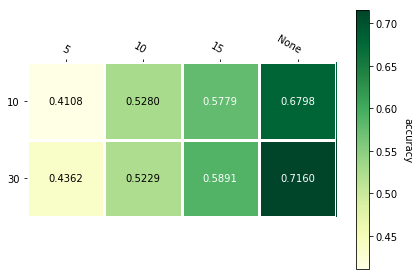



Testing SVMs



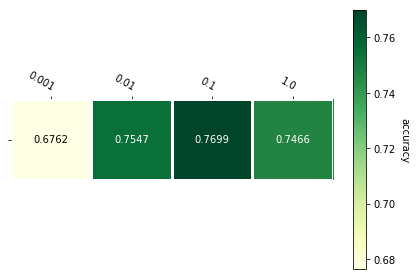



Testing logistic regression



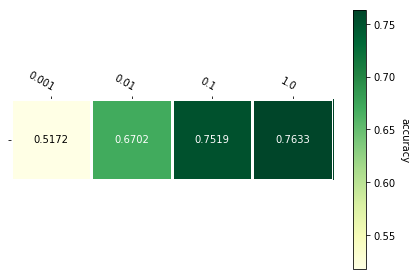

In [4]:
print("Testing the forrests")
print("")
forrest_scores = forrest_tester(x_train, y_train, [10,30], [5,10,15,None], folds = 2, plot = True)
print("")
print("")

print("Testing SVMs")
print("")
svm_scores = svm_tester(x_train, y_train, [0.001, 0.01, 0.1, 1], folds = 2, plot = True)
print("")
print("")

print("Testing logistic regression")
print("")
logistic_scores = logistic_tester(x_train, y_train, [0.001, 0.01, 0.1, 1], folds = 2, plot = True)
print("")
print("")



## Cross validation for MLP. 
This takes ages to run!

Testing MLP



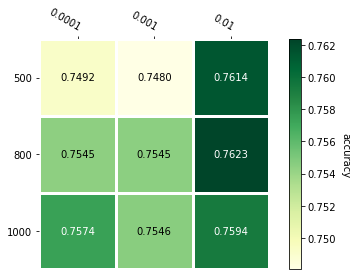

In [6]:
#print("Testing MLP")
#print("")
#mlp_scores = mlp_tester(x_train, y_train, [500, 800, 1000], [0.0001, 0.001, 0.01], folds = 2, plot = True)
#print("")
#print("")